In [142]:
import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import solve

**Tres puntos**

Sean:

$ x_0 = -1 $ ; $ x_1 = 0 $ ; $ x_2 = 1 $ ; $ y_0 = 5 $ ; $ y_1 = 3 $ ; $ y_2 = 3 $

In [143]:
x_2 = np.array([-1,0,1])
y_2 = np.array([5,3,3])

Así:
  * $s_0(x) = a_0 + b_0 (x-x_0) + c_0 (x-x_0)^2 + d_0 (x-x_0)^3$
  * $s_1(x) = a_1 + b_1 (x-x_1) + c_1 (x-x_1)^2 + d_1 (x-x_1)^3$

Entonces
  * $s_0'(x) =  b_0 + 2 c_0 (x-x_0) + 3 d_0 (x-x_0)^2$
  * $s_0''(x) = 2 c_0 + 6 d_0 (x-x_0)$

Y:
  * $s_1'(x) =  b_1 + 2 c_1 (x-x_1) + 3 d_1 (x-x_1)^2$
  * $s_1''(x) = 2 c_1 + 6 d_1 (x-x_1)$

Tenemos 8 incógnitas, $a_1$, $b_1$, $c_1$, $d_1$, $a_2$, $b_2$, $c_2$, $d_2$.
Aplicando las condiciones:

  * Interpolación (y continuidad en x_1):

    * $s_0(x_0) = a_0 = y_0$
    * $s_0(x_1) = a_0 + b_0 (x_1-x_0) + c_0 (x_1-x_0)^2 + d_0 (x_1-x_0)^3 = y_1$
    * $s_1(x_1) = a_1 = y_1$
    * $s_1(x_2) = a_1 + b_1 (x_2-x_1) + c_1 (x_2-x_1)^2 + d_1 (x_2-x_1)^3 = y_2$
    
  * Derivabilidad:

    * $s_0'(x_1) = s_1'(x_1) $,
    es decir:
    * $b_0 + 2 c_0 (x_1-x_0) + 3 d_0 (x_1-x_0)^2 = b_1 $
    
    y:

    * $s_0''(x_1) = s_1''(x_1)$,
    es decir:
    * $2 c_0 + 6 d_0 (x_1-x_0) = 2 c_1$

  * Condiciones naturales en los extremos, $x_0$ y $x_2$:

    * $s_0''(x_0) = 2 c_0 = 0$
    * $s_1''(x_2) = 2 c_1 + 6 d_1 (x_2-x_1) = 0$


In [144]:
row_1 = lambda x_0,x_1,x_2 :  [ 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ]
row_2 = lambda x_0,x_1,x_2 :  [ 1 , (x_1-x_0) , (x_1-x_0)**2 , (x_1-x_0)**3 , 0 , 0 , 0 , 0 ]
row_3 = lambda x_0,x_1,x_2 :  [ 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 ]
row_4 = lambda x_0,x_1,x_2 :  [ 0 , 0 , 0 , 0 , 1 , (x_2-x_1) , (x_2-x_1)**2 , (x_2-x_1)**3 ]
row_5 = lambda x_0,x_1,x_2 :  [ 0 , 1 , 2*(x_1-x_0) , 3*(x_1-x_0)**2, 0 , -1 , 0 , 0 ]
row_6 = lambda x_0,x_1,x_2 :  [ 0 , 0 , 2 , 6*(x_1-x_0) , 0 , 0 , -2 , 0 ]
row_7 = lambda x_0,x_1,x_2 :  [ 0 , 0 , 2 , 0 , 0 , 0 , 0 , 0 ]
row_8 = lambda x_0,x_1,x_2 :  [ 0 , 0 , 0 , 0 , 0 , 0 , 2 , 6*(x_2-x_1) ]

In [145]:
b = lambda y_0,y_1,y_2 :  np.array([ y_0 , y_1 , y_1 , y_2 , 0 , 0 , 0 , 0 ])

In [146]:
A_2 = np.array([
	row_1(*x_2),
	row_2(*x_2),
	row_3(*x_2),
	row_4(*x_2),
	row_5(*x_2),
    row_6(*x_2),
    row_7(*x_2),
    row_8(*x_2)])

B_2 = b(*y_2)

In [147]:
A_2, B_2

(array([[ 1,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  1,  1,  1],
        [ 0,  1,  2,  3,  0, -1,  0,  0],
        [ 0,  0,  2,  6,  0,  0, -2,  0],
        [ 0,  0,  2,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  2,  6]]),
 array([5, 3, 3, 3, 0, 0, 0, 0]))

In [148]:
coe_2 = solve(A_2,B_2)

print('Los coeficientes a0, b0, c0, d0, a1, b1, c1, d1 son: '+str(coe_2[:])+' respectivamente')

Los coeficientes a0, b0, c0, d0, a1, b1, c1, d1 son: [ 5.  -2.5  0.   0.5  3.  -1.   1.5 -0.5] respectivamente


In [149]:
s0 = lambda x, x_0: coe_2[0] + coe_2[1]*(x - x_0) + coe_2[2]*((x - x_0)**2) + coe_2[3]*((x - x_0)**3)
s1 = lambda x, x_1: coe_2[4] + coe_2[5]*(x - x_1) + coe_2[6]*((x - x_1)**2) + coe_2[7]*((x - x_1)**3)

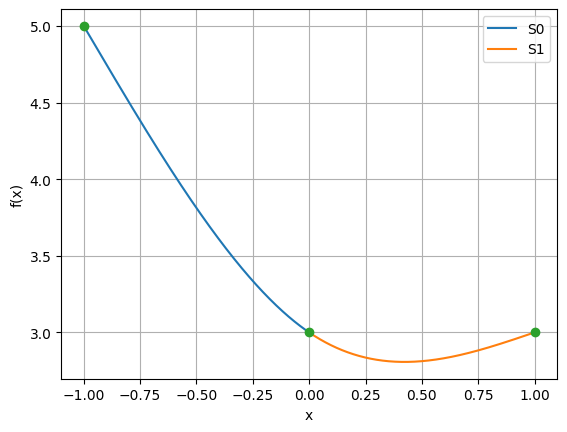

In [150]:
X_0 = np.linspace(-1,0,1000)
X_1 = np.linspace(0,1,1000)

plt.plot(X_0, s0(X_0,-1), label = "S0")
plt.plot(X_1, s1(X_1,0), label = "S1")
plt.plot(x_2,y_2, 'o')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()

**Cuatro puntos**

Sean:

$ x_0 = -1 $ ; $ x_1 = 0 $ ; $ x_2 = 1 $ ; $ x_3 = 2 $ ; $ y_0 = 5 $ ; $ y_1 = 3 $ ; $ y_2 = 3 $ ; $ y_3 = 7 $

In [151]:
x_3 = np.array([0, 1, 2])
y_3 = np.array([3, 3, 7])

In [152]:
A_3 = np.array([
	row_1(*x_3),
	row_2(*x_3),
	row_3(*x_3),
	row_4(*x_3),
	row_5(*x_3),
    row_6(*x_3),
    row_7(*x_3),
    row_8(*x_3)])

B_3= b(*y_3)

In [153]:
A_3, B_3

(array([[ 1,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  1,  1,  1],
        [ 0,  1,  2,  3,  0, -1,  0,  0],
        [ 0,  0,  2,  6,  0,  0, -2,  0],
        [ 0,  0,  2,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  2,  6]]),
 array([3, 3, 3, 7, 0, 0, 0, 0]))

In [154]:
coe_3 = solve(A_3,B_3)

print('Los coeficientes a0, b0, c0, d0, a1, b1, c1, d1 son: '+str(coe_3[:])+' respectivamente')

Los coeficientes a0, b0, c0, d0, a1, b1, c1, d1 son: [ 3. -1.  0.  1.  3.  2.  3. -1.] respectivamente


In [155]:
s1 = lambda x, x_1: coe_3[0] + coe_3[1]*(x - x_1) + coe_3[2]*((x - x_1)**2) + coe_3[3]*((x - x_1)**3)
s2 = lambda x, x_2: coe_3[4] + coe_3[5]*(x - x_2) + coe_3[6]*((x - x_2)**2) + coe_3[7]*((x - x_2)**3)

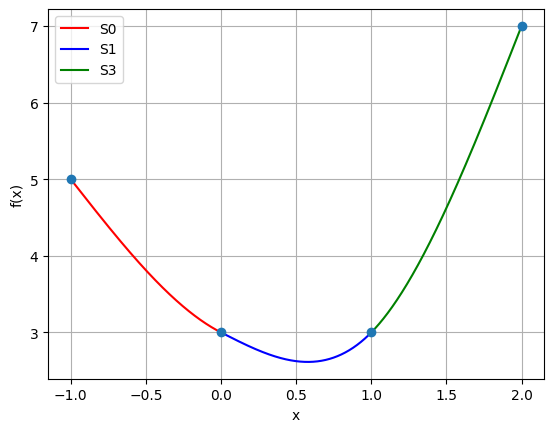

In [156]:
x_, y_ = np.array([-1,0,1,2]), np.array([5,3,3,7])
X_2 = np.linspace(1,2,1000)

plt.plot(X_0, s0(X_0,-1), 'r', label = "S0")
plt.plot(X_1, s1(X_1,0), 'b', label = "S1")
plt.plot(X_2, s2(X_2,1), 'g', label = "S3")
plt.plot(x_,y_, 'o')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()